# Procesos Estocásticos y Cadenas de Markov

## Ideas básicas y conceptos

Cuando se requiere un modelo estocástico, el sistema es mejor representado como un conjunto de variables aleatorias, indexadas por un parámetro que puede ser el tiempo o el espacio.

> **Definición** La colección de variables aleatorias $X =\left\{X_t, t \in T\right\}$, es llamado un **proceso estocástico**, donde $T$ es el conjunto índice, y $X_t$ toma valores de $\Omega$, se dice que $\Omega$ es el **espacio de estados**. 

Solamente se tratará con *eventos de tiempo discreto* (es decir, cuando $T$ es una secuencia de valores discretos, y *espacio de estados finito.*

Las probabilidades de transición $p_{ij}$ indican la probabilidad de que el proceso esté en un estado $X_{t+1} = j$ en el tiempo $t + 1$, dado que estaba en el estado $X_t = i$ en el tiempo $t$; en otras palabras $p_{ij} = P(X_{t+1} = j |X_t = i)$. Se asume que las probabilidades de transición son estacionarias (independientes en el tiempo).

Para las Cadenas de Markov se asume que se *cumple la propiedad Markoviana*, es decir, que el estado actual (en $t$) del proceso depende únicamente del estado anterior del sistema (en $t -1$), de igual manera sucede con las probabilidades de transición.

> **Definición** Un proceso estocástico es una **cadena de Markov** con distribución inicial $\boldsymbol{\mu} = [\mu_i]$ y matriz de transición $\mathbf{P} = [p_{ij}]$ si para todo $t \in T$ e $i, j \in \Omega$: $P(X_0 = i) = \mu_i$ y $P(X_{t+1} = j | X_t = i) = p_{ij}$.

Si los variables de $p_{ij}$ son invariables respecto a $T$ se dice que la cadena es *estacionaria*.

### Ejemplo 1

Sea una Cadena de Markov de 4 estados $S_i, i=1, 2, 3, 4$ y matriz de transición de estados dada por: 

In [1]:
import numpy as np
P1 = np.matrix([[.9, .06, .03, .01], [0, .85, .1, .05], [0, 0, .75,.25], [0, 0, 0, 1]])
P1

matrix([[ 0.9 ,  0.06,  0.03,  0.01],
        [ 0.  ,  0.85,  0.1 ,  0.05],
        [ 0.  ,  0.  ,  0.75,  0.25],
        [ 0.  ,  0.  ,  0.  ,  1.  ]])

Note que la suma a lo largo de las filas son todas iguales a uno, como debe ser siempre. También, una vez que el proceso alcanza el estado $S_4$ nunca abandonará este estado, por lo tanto es un *estado absorbente*. Finalmente, dado que todos los elementos debajo de la diagonal principal, y solamente esos, son iguales a cero, el proceso solamente puede cambiar del estado $S_i$ al estado $S_j$ si $i < j$.

> En el caso anterior , se utilizó el módulo `numpy` para crear una matriz, aprovechemos de mostrar algunos módulos interesantes, uno es `pandas` con el que se pueden crear poderosas tablas de datos de nombre `DataFrame`. Un `DataFrame` a diferencia de una matriz de `numpy` admite el uso de etiquetas tanto para filas como columnas.

In [2]:
import pandas as pd
names = ['S' + i for i in '1234']
DF1 = pd.DataFrame(P1, index=names, columns=names)
DF1

S1    S2    S3    S4
S1  0.9  0.06  0.03  0.01
S2  0.0  0.85  0.10  0.05
S3  0.0  0.00  0.75  0.25
S4  0.0  0.00  0.00  1.00

> Aprovechamos también de mostrar el móduto de álgebra simbólica `sympy` que facilita la generación de salidas en formato $\LaTeX$.

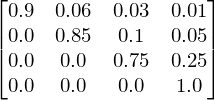

In [3]:
import sympy as sy
sy.init_printing(use_unicode=True)
sy.Matrix(P1)

En un *diagrama de transición* o *diagrama de estados*, los nodos representan los estados del proceso, y los vértices representan las transiciones con probabilidad positiva. El diagrama de transición para el ejemplo dado se muestra en la figura a continuación:

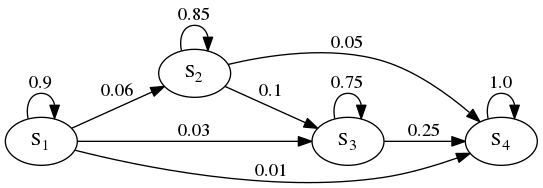

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from nxpd import draw
G1 = nx.DiGraph()
subs_names = ['<S<sub>{}</sub>>'.format(i) for i in '1234']
for name, sname in zip(names, subs_names):
    G1.add_node(name, label=sname)
for i, u in enumerate(names):
    for j, v in enumerate(names):
        if P1[i, j]:
            G1.add_edge(u, v, label=P1[i, j])
G1.graph['rankdir'] = 'LR'
draw(G1, show='ipynb')

> En este caso se utiliza la biblioteca `networkx` para construir el grafo, y la biblioteca `nxpd` que permite tomar  una visualización del grafo generada en [graphviz](http://graphviz.org) e insertarla en el cuaderno Jupyter.

Nótese que los estados absorbentes solamente tienen arcos que entrantes, pero no salen (al menos no hacia otros estados).

Las probabilidades de transición nos indican cuál es la probabilidad que esté en unn estado en particular un período después que termine el proceso. ¿Pero que sucede para dos o más períodos?

### Ejemplo 2

Considere la siguiente matriz de probabilidades de transición:

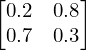

In [5]:
P2 = np.matrix([[.2, .8],[.7, .3]])
sy.Matrix(P2)

Cuando se analizan los cambios a lo largo de múltiples períodos, podemos utilizar un grafo de *estado-tiempo* como se muestra en la figura, donde los nodos indican el estado de la naturaleza $i$ al final del período $t$, los arcos denotan las probabilidades de transición. Como las probabilidades de transición son estacionarias, un arco desde $S_i^t$ a $S_i^{t+1}$ tendrá el mismo valor que un arco desde $S_i^{t+2}$ a $S_i^{t+3}$.

In [6]:
import pygraphviz as pgv
G2 = pgv.AGraph(directed=True)
names = ['S{}{}'.format(i, j) for j in '012' for i in '12']
subs_names = ['<S<sub>{}</sub><sup>{}</sup>>'.format(i, j) for j in '012' for i in '12']
for i, (name, sname) in enumerate(zip(names, subs_names)):
    G2.add_node(name, label=sname)
for k in range(2): # for steps
    for i in range(2): # for input states
        for j in range(2): # for output states
            if P2[i, j]:
                G2.add_edge(names[i + 2*k], names[j + 2*k + 2], label=P2[i, j])
G2.graph_attr['rankdir'] = 'LR'
G2.add_subgraph(names[:2], name = "cluster1", rank = "same", style = "invisible")
G2.add_subgraph(names[2:4], name = "cluster2", rank = "same", style = "invisible")
G2.add_subgraph(names[4:], name = "cluster3", rank = "same", style = "invisible")
G2.layout('dot')
G2.draw('ejemplo2.png')

![ejemplo2](ejemplo2.png)

> Se ha utilizado en este caso el módulo `pygraphviz` porque es mas estable y soporta mas funcionalidades de `graphviz`, con la limitación de que no genera las imágenes inline.

Revisemos la figura anterior, y asumamos que estamos en el estado $S_1^0$. Para encontrar la probabilidad de moverse del estado actual $S_1^0$ al estado $S_1^2$ en dos períodos, se tienen que estudiar dos rutas:

- la primera ruta nos lleva de $S_1^0$ a $S_1^1$ y de allí a $S_1^2$
- mientras la segunda ruta nos lleva de $S_1^0$ primero a $S_2^1$ y después a $S_1^2$

La probabilidad se calcula entonces como la suma de probabilidades a lo largo de cada ruta.

En este ejemplo, la probabilidad sobre la primera ruta $S_1^0 - S_1^1 - S_1^2$. es:

In [10]:
# Recordar que los índices del objeto np.matrix empiezan en 0
P2[0, 0] * P2[0, 0] # En este caso 0.2 x 0.2

Mientras que la probabilidad sobre la segunda ruta $S_1^0 - S_2^1 - S_1^2$. es:

In [12]:
P2[0, 1] * P2[1, 0] # En este caso 0.8 x 0.7

Así se obtiene la probabilidad de transición de dos pasos:

In [13]:
P2[0, 0] * P2[0, 0] + P2[0, 1] * P2[1, 0] # 0.04 + 0.56 = 0.60

De igual manera, se calculan las probabilidades de transición restantes desde el período $t$ al período $t+2$. Esto es:

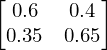

In [17]:
P22 = P2 * P2 # P2 es un objeto tipo matriz
sy.Matrix(P22)

Este procedimiento puede repetirse para cualquier número de períodos. Aunque es posible, el proceso es complicado y se puede alcanzar los mismos resultados por multiplicación matricial (esta es la *ecuación de Chapman-Kolgomorov*).

En particular, se puede obtener $P^2 = P \times P$, $P^3 = P^2 \times P = P \times P \times P$, y así sucesivamente, de manera tal que se puede obtener $P^r = P \times P \times P \dots P$, es la matriz $P$ multiplicada por sí misma $r$ veces. Así, en el ejemplo de arriba se tiene $P^3$ como:

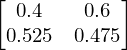

In [18]:
P23 = P22 * P2
sy.Matrix(P23)